# Implement RC4

In [1]:
import numpy as np
import secrets

In [2]:
def xor_bytes(b1:bytes, b2:bytes) -> bytes:
    return bytes((byte1 ^ byte2) for byte1, byte2 in zip(b1, b2))

In [3]:
class RC4:
    def __init__(self, key:bytes) -> None:
        self.S = [i for i in range(256)]
        self.T = self.__repeat_string(key, 256)

        j = 0
        for i in range(256):
            j = (j + self.S[i] + self.T[i]) % 256
            self.S[i], self.S[j] = self.S[j], self.S[i]
    
    def __repeat_string(self, a_string:str, target_length:int) -> str:
        number_of_repeats = target_length // len(a_string) + 1
        a_string_repeated = a_string * number_of_repeats
        a_string_repeated_to_target = a_string_repeated[:target_length]
        return a_string_repeated_to_target
        
    def __gen_key(self, len_text:int) -> bytes:
        i, j = 0, 0
        key = []
        for _ in range(len_text):
            i = (i + 1) % 256
            j = (j + self.S[i]) % 256
            self.S[i], self.S[j] = self.S[j], self.S[i]
            t = (self.S[i] + self.S[j]) % 256
            key.append(self.S[t])
        return bytes(key)
        
    def encrypt(self, p_text:str) -> bytes:
        p_text = bytes(p_text, 'utf-8')
        key = self.__gen_key(len(p_text))
        cipher = xor_bytes(p_text, key)
        return cipher

    def decrypt(self, cipher:bytes) -> str:
        key = self.__gen_key(len(cipher))
        dec = xor_bytes(cipher, key)
        return dec.decode('utf-8')

In [4]:
key = "I am the key"
text = "Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling. The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry. The main story arc concerns Harry's struggle against Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic and subjugate all wizards and Muggles (non-magical people)."

In [5]:
bkey = bytes(key, "utf-8")
sender_rc4 = RC4(bkey)
reciever_rc4 = RC4(bkey)

In [6]:
cipher = sender_rc4.encrypt(text)
dec = reciever_rc4.decrypt(cipher)

In [7]:
text

"Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling. The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry. The main story arc concerns Harry's struggle against Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic and subjugate all wizards and Muggles (non-magical people)."

In [8]:
cipher

b".\xa7\xc8\x1c\xf9 @F\x8bzR^4_\x1d\x87?\xce\xe1\xf2\xd0PDT\xca\x80\xe2\xc7\n0H[\x19=\x16<\xeb\xa1rK\xaf\xca\xa2y\xeb\x94,\xe1\x8e\xab\xf3\x8bb\xd21\xce\x8c\xc9\x8d{\xcf\xbet\x81\xb6\x99\xed\x9b%UX\xaawlW{\xb3\x80<\x18\xf9\x1e\x18\r\xfb\xda\xf1z=+\x8c\xbe\xaa.\xa3\xe5\\\xe8\x0b\xa4Vm\xa1jg\r\x93\xbb\xb5\xae\xc2\xbc\xd5W\xe8\xf0l\xbe\x11\x89f5`|`\x15\xb8\xa6\x9a\xef<\xed\x07\x98\xe6q\xd1\x85\xe3\x90#\xd4\xd4Cgfjs\xbcO'N\x8b\xf9\xda\x14\xdf\xde\x94\xcd\x1a:3\xffG6\xd3\xc1\xe8\xa0\xa3\xa5\x7f\xd2\x05\x13`u\x8f\xf2\xaf\x04o\x1f\xc8~W:\xf3\xf8uE\xcc\xd9G\x93=\xd6d\xd8m\xcb\xad\x02Z\\\xc6\xffA\x16\x95\xeb\xda9J\xfb2\x80U\xc4\xd4\xea\x0e\xa0\xefF*\xcbQ\xb1\xf9W\xb3\xc8|\x89\xc7?p\x80\x80N\x9a*\xd5\xe7 ]\xf4\\?P\x01\x8f\x16H1\xad\nT\xa4\x12\xf0\x17\xcf\x1b\xa6i\xc4\xb1\xe9YSp\xf3k\xfb\xfb\xf7pX%\x86\x84\xd2v#<w\xa4\xae\xa2l\x07\x8c\\\xe7}f$[\xd9\x89T5\xafE\x8a\xfa\xda\x94\xe2H\xe9L\xd7^=K4\xb6\x19\xfa\xb4\xf27\xe1@>q\xb9C\xff\xaa\xd57\x0c\xb9<\xa3\xcf\xdbn\x93\x9c\xae\xc2\x07\xf1\x98H\xa4SV%,\

In [9]:
dec

"Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling. The novels chronicle the lives of a young wizard, Harry Potter, and his friends Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry. The main story arc concerns Harry's struggle against Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic and subjugate all wizards and Muggles (non-magical people)."

# Generate two outputs and XOR them

In [10]:
import secrets
import random
random.seed(7)

In [11]:
def toggle_bit(value, bit_index):
    return value ^ (1 << bit_index)

In [12]:
def random_flip(byte_str:bytes, bits_to_flip:int) -> bytes:
    byte_arr = bytearray(byte_str)
    for i in range(bits_to_flip):
        random_byte = random.randint(0,len(byte_arr)-1)
        random_bit = random.randint(0,7)
        byte_arr[random_byte] = toggle_bit(byte_arr[random_byte], random_bit)

    return bytes(byte_arr)

In [13]:
k1 = secrets.token_bytes(nbytes=256)
k2 = random_flip(k1, 2)

In [14]:
k1 == k2

False

In [15]:
sender_rc4 = RC4(k1)
reciever_rc4 = RC4(k2)

In [16]:
c1 = sender_rc4.encrypt(text)
c2 = reciever_rc4.encrypt(text)

In [17]:
c1 == c2

False

In [18]:
xor_bytes(c1, c2)

b'\x08\x05\\\xfb\x06e\xd1E\xd6>\xabM\xd0\x98@\xfeh:j\xcd\xf9\xb7\x06\ra0\xcf\xf7\xda\xe3\xdc\xf5\xe8C\x93\x9dG\x92\xd8\x1b\xfc\x90\x0f\xd7\xc9H:z#\x82|\xa7[\xd0v\xa7\xdd\xcb\xeb\xe4\x0cM\x0c\xc6\xa7D(\xfe\xb4i\x91\x1c\xdb~(1\xeb\xa7\x9a\xe2N\xc8\x87\xe1\xf7\x97\xb5\x0f\x1f\xac\xb5\xde\xb7\xaa@\x95\xa2\x16Q\x97\x9b\xcf\x1b\xa7\xe0j\xdd\xdd\x7fQj\xf3\xc1\xe7o]\xd6\xee\x8a\xd3$\xf3\xab\n\xa9X\xee\xea\xff\xdbji\xf0\xd9)s;i\xf7#\\\xf0/`UT\x07\xd3\xe1\xc4\xb5\'B\xbc`\xc5i:\x9d\n\xa4Q\x1d\x8a\xab\x8c\xdf\xd1\xb7\x89\xa8Q,\xb2U\xef\xd2\xea\xdd\r\x19\x00\xe2r\xb76\x82d\xaf&\x1cM[\x9fX^\xa78\xebM\x1a:\x94\x13\xdb\xae\xf8\x00\xf3"@\x87\'\xa6\xa9\xbd\x15T\xaa\x8aY\xd2\x0c\xe4\xe3\x85X\xb1\xe2,\x9f\xbf\xcc\xb1\x9d\x0b\xb3&rz\x0b\x8cC\t\xa9\x1f<\xca\xc8\xf8\xcf\'b\x15\x0e\x80F\xcf(\x82\xb9[\xa6\xadPV\xf7\xd8v\xcc,\x87\x8b\xb1\xf0\xcc\xf8\x04f\x07zr\x8d\x97\x81o\xf5\x0b\xa2\xec\x0b!(\xd5\xf7\xf8)\x00\xfa\x07\x8ad\xfdS\x95\x8d\xf6X\xc1X\xca\x8f\xc9_\xad\x15\x10\xd1\xa2$JI\xc4\xc1aLJ\x11\x0bw\xf8\x0f+%

# Analyze randomness

In [19]:
def count(text:bytes):
    counters = [0 for i in range(256)]

    for byte in text:
        counters[byte] += 1
    return counters

In [20]:
counters = count(cipher)

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

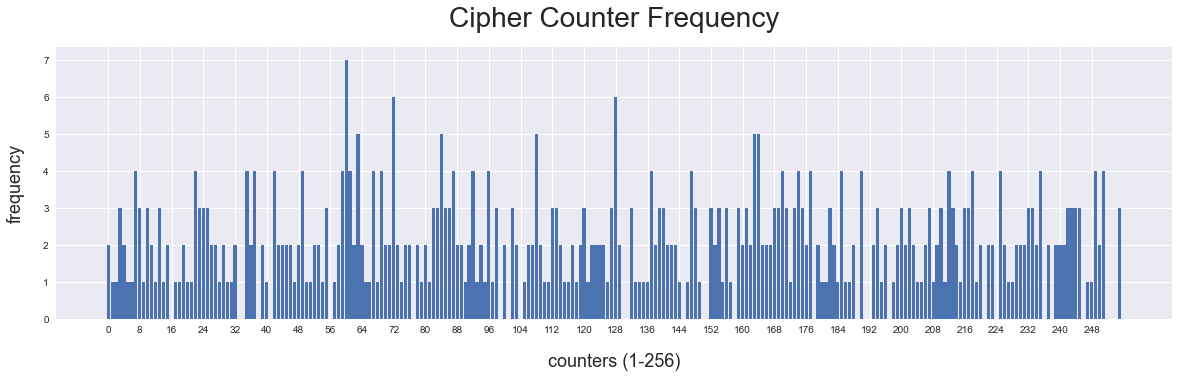

In [22]:
plt.figure(figsize=(20,5))
plt.bar(x=[i for i in range(256)], height=counters)
plt.xticks([i for i in range(0, 256, 8)])
plt.title("Cipher Counter Frequency", fontsize=28, pad=20)
plt.xlabel("counters (1-256)", fontsize=18, labelpad=18)
plt.ylabel("frequency", fontsize=18, labelpad=18)
plt.show()

In [23]:
def randomness(text:bytes):
    counters = count(text)
    C = len(counters)
    N = len(text)
    D = np.var(counters)

    return (C*D)/N


In [24]:
randomness(cipher)

0.8412037596711799

# Run randomness test lots of times

In [1]:
indices = [2**j for j in range(1, 11)]
indices

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [77]:
k1 = secrets.token_bytes(256)
s1_rc4 = RC4(k1)
c1 = s1_rc4.encrypt(text)

r_dict = dict()
for idx in indices:
    subtext = text[:idx]

    r = []
    for i in range(1,33):
        k2 = random_flip(k1, i)
        s2_rc4 = RC4(k2)
        c2 = s2_rc4.encrypt(subtext)
        mix = xor_bytes(c1, c2)
        r.append(randomness(mix))
        
    r_dict[idx] = r

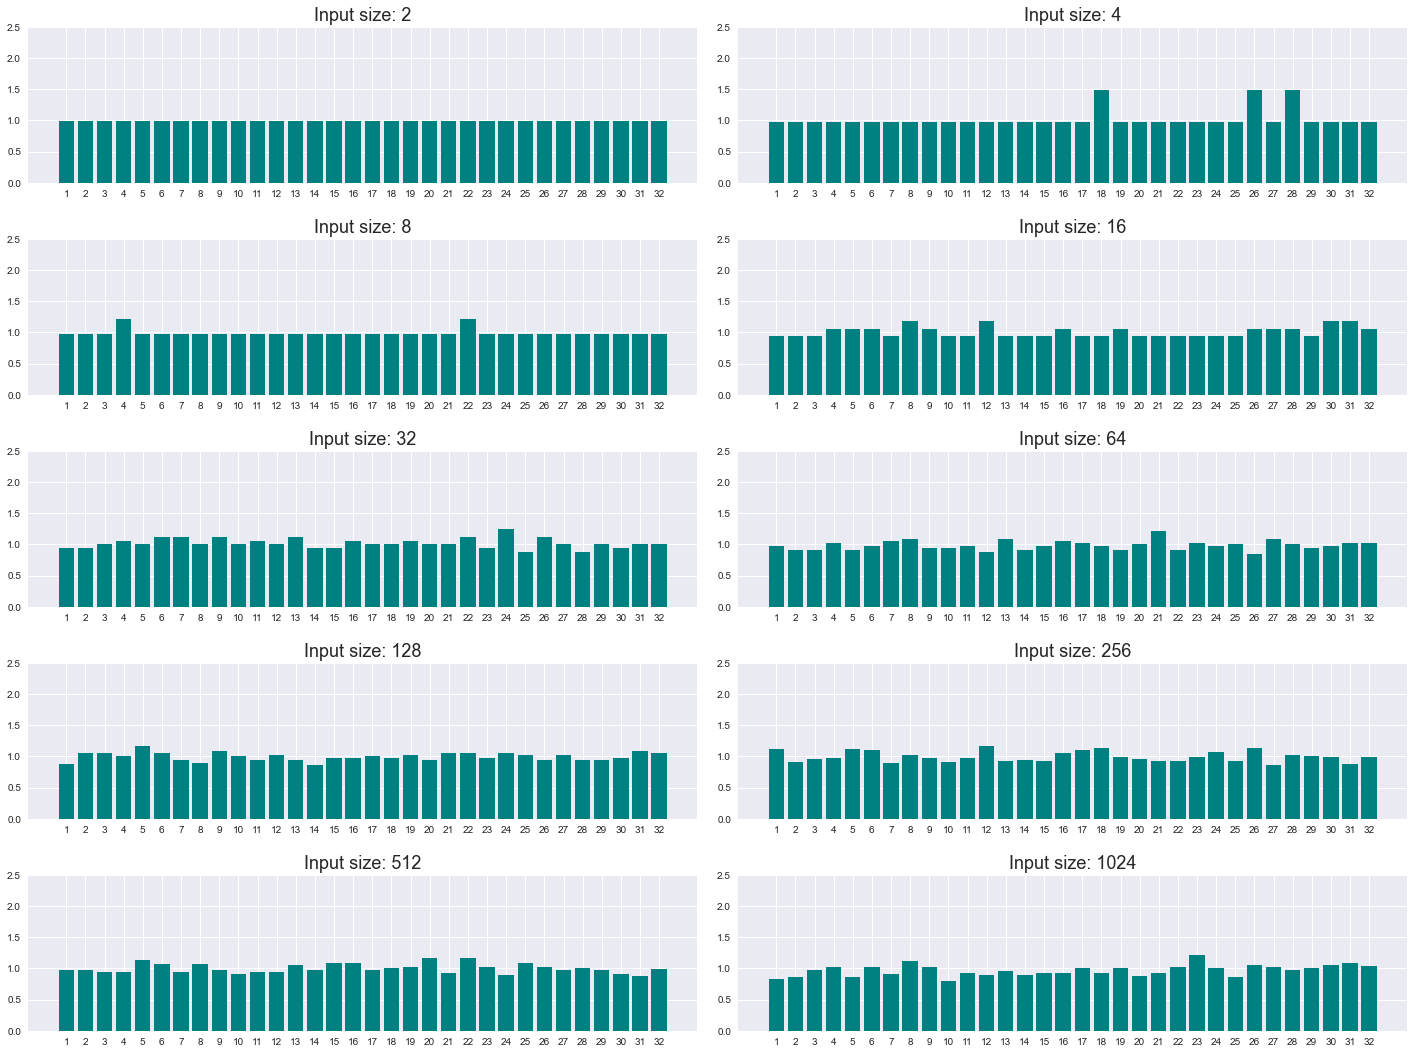

In [78]:
fig = plt.figure(figsize=(20,15))
for i, idx in enumerate(indices):
    plt.subplot(5,2,i+1)
    plt.bar(range(1,33), np.round(r_dict[idx], 2), label=idx, color='teal')
    plt.xticks(range(1,33))
    plt.ylim(0,2.5)
    plt.title(f"Input size: {idx}", fontsize=18)
# plt.xlabel("Bit changes in the key (1-32)", fontsize=18, labelpad=18)
# plt.ylabel("Randomness", fontsize=18, labelpad=18)
# plt.legend()
fig.tight_layout(pad=2)
plt.show()